In [1]:
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import glob

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score

import cv2

<h4>Read the Images</h4>

In [2]:
tumor = []
path_yes = './brain_tumor_dataset/yes/*.jpg'

#read the files using iglob, translate images using cv2
for f in glob.iglob(path_yes):
    img = cv2.imread(f)
    img = cv2.resize(img, (128,128))
    
    #turn image back into rgb
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    
    tumor.append(img)

In [3]:
healthy = []
path_no = './brain_tumor_dataset/no/*.jpg'

#read the files using iglob, translate images using cv2
for f in glob.iglob(path_no):
    img = cv2.imread(f)
    img = cv2.resize(img, (128,128))
    
    #turn image back into rgb
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    
    healthy.append(img)

In [4]:
healthy = np.array(healthy)
tumor = np.array(tumor)
both = np.concatenate((healthy, tumor))

<h4>Visualize the MRI Images</h4>

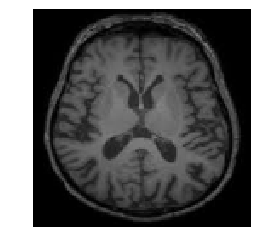

In [6]:
fig, ax = plt.subplots()

ax.imshow(healthy[0])

ax.axis('off')
plt.show()

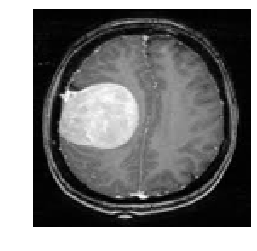

In [7]:
fig, ax = plt.subplots()

ax.imshow(tumor[0])

ax.axis('off')
plt.show()

In [51]:
def viz_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]
    
    fig, axs = plt.subplots(1, num, figsize = (16,9))
    for i in range(num):
        axs[i].imshow(healthy_imgs[i])
        axs[i].axis('off')
        axs[i].set_title('Healthy')
    plt.show()
        
    fig, axs = plt.subplots(1, num, figsize = (16,9))
    for i in range(num):
        axs[i].imshow(tumor_imgs[i])
        axs[i].axis('off')
        axs[i].set_title('Tumor')
        
    plt.show()
        

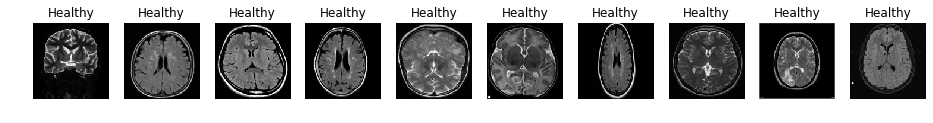

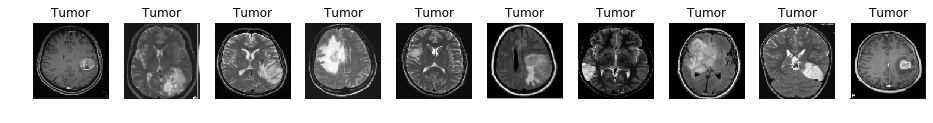

In [52]:
viz_random(healthy, tumor, 10)

<h4>Create Torch Dataset Class</h4>

In [2]:
class Dataset(object):
    def __getitem__(self,index):
        raise NotImplementedError
        
    def __len__(self):
        raise NotImplementedError
        
    def __add__(self,other):
        return ConcatDataset([self,other])

<h4>MRI Custom Dataset Class</h4>

In [7]:
class MRI(Dataset):
    def __init__(self):
        
        tumor = []
        healthy = []
        path_yes = './brain_tumor_dataset/yes/*.jpg'
        path_no = './brain_tumor_dataset/no/*.jpg'

        #read the files using iglob, translate images using cv2
        for f in glob.iglob(path_yes):
            img = cv2.imread(f)
            img = cv2.resize(img, (128,128))

            #turn image back into rgb
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))

            tumor.append(img)
            
        #read the files using iglob, translate images using cv2
        for f in glob.iglob(path_no):
            img = cv2.imread(f)
            img = cv2.resize(img, (128,128))

            #turn image back into rgb
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))

            healthy.append(img)
        
        #put the images in an array
        tumor = np.array(tumor, dtype=np.float32)
        healthy = np.array(healthy, dtype=np.float32)
        
        #labels
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)
        
        #set the images and labels
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label), axis=0)
        
    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self,index):
        sample = {'image': self.images[index], 'label':self.labels[index]}
        return sample
    
    def normalize(self):
        self.images = self.images/255

In [13]:
mri = MRI()

In [20]:
mri.normalize()

In [21]:
len(mri)

245

In [23]:
np.max(mri[5]['image'])

1.0